# Credit Card Fraud Detection

----

<font size=3>

This project focuses on developing an artificial intelligence solution to address the prevalent issue of fraudulent transactions in the credit card industry. Fraudulent activities, where third parties gain unauthorized access to customer information and perform unauthorized transactions, pose significant challenges for banks and financial institutions. 
    
The objective of this project is to leverage data science techniques and build a model using labeled fraud records to accurately detect and prevent fraudulent transactions, while ensuring seamless approval for legitimate transactions. By utilizing machine learning algorithms, the model aims to automate the identification of fraudulent patterns and reduce the reliance on rule-based systems. The dataset used for this project consists of one month's worth of credit card transactions, with a binary fraud label assigned. (1 for fraudulent transactions and 0 for legitimate transactions)

----

## Table of Contents

<br>

<font size=3>

<ol style="list-style-type: decimal;">
    <li><a href="#eda" style="text-decoration: none;">Exploratory Data Analysis</a></li>
    <li><a href="#features" style="text-decoration: none;">Feature Engineering</a></li>
    <li><a href="#model" style="text-decoration: none;">Building the Model</a></li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

df = pd.concat([train, test], axis=0)
df = df.drop(["ID"], axis=1)
df.columns = df.columns.str.lower()
df = df.reset_index(drop=True)

In [3]:
del train
del test

In [4]:
df

,target,cst_nr,cc_nr,day_of_month,day_of_week,txn_time,txn_source,txn_trm,txn_entry,txn_amnt,city,country,mc_name,mc_id,mcc_code
0,0.0,c64007916f81cb9543a6aacc768a15d5eefde44318b3c0...,bf4e876751b8785159aad106b055123b6cdda8a9591d5f...,8.0,4.0,1800.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,540.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,09adaccd88433a530071a5c7437e3d03c4a3eefae1bbcc...,e0d92b0729b1406983f91eaf8600b24236a53d88e32efa...,9bcde6cbc9021358668bc16cd3fbf6715669db89fd4570...
1,0.0,24882e5a50d43c050f71ffdfc0061550a8bf5e6eb0911c...,933c28d9d4c6fb6db04a2209f34def95497ea3060f581b...,11.0,7.0,1404.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,49490.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,0b0b39198d9a5f47e27f7ee20aded3e0d4f29ba3c8dfdf...,2b047d7167ac6b27522c339cff056ac613730477cc511c...,3c7ce134e41449a3fbe18892efdf90304e12e052ae35a2...
2,0.0,24882e5a50d43c050f71ffdfc0061550a8bf5e6eb0911c...,194024f4b029f8df4e045ad034588ef6fc1957d39ab3d5...,17.0,6.0,1750.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,5040.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,59c94e8a976c930a684743605363d473e929b2d265b6d3...,2ff0f25b15cabe373de08aa40c1adb2796b59cbecd31ae...,2ae12c28b5bebf8e0b332f8eeb226ebba9de07a958db9b...
3,0.0,24882e5a50d43c050f71ffdfc0061550a8bf5e6eb0911c...,194024f4b029f8df4e045ad034588ef6fc1957d39ab3d5...,1.0,4.0,1741.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,10.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,a7db20b1dba321830a2e7abdebda548a117b20caf75be8...,e60354c25c84c774233d2c5290eb669b3f60604d71ac3e...,03a768696503f2039b82f8ab09c7c2c1d7c59fd5357ddd...
4,0.0,24882e5a50d43c050f71ffdfc0061550a8bf5e6eb0911c...,933c28d9d4c6fb6db04a2209f34def95497ea3060f581b...,7.0,3.0,2344.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,47760.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,0b0b39198d9a5f47e27f7ee20aded3e0d4f29ba3c8dfdf...,2b047d7167ac6b27522c339cff056ac613730477cc511c...,3c7ce134e41449a3fbe18892efdf90304e12e052ae35a2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933734,NaN,d044568959f4185f154cdd2162287c64f55380846ebb42...,d2c58c43f4bcc0b954cf6b247690ffafc64f5a77254760...,26.0,1.0,1731.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,130.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,34023684e38927b44a11078e921967483da8afb0452526...,d4c426cef1de3e40719a4da5a72effa9e6fccd3732587d...,f334ac9eaeb3276272f270538e1cd3b27d8c8b8d719374...
933735,NaN,d044568959f4185f154cdd2162287c64f55380846ebb42...,d2c58c43f4bcc0b954cf6b247690ffafc64f5a77254760...,25.0,7.0,1811.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,100.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,b05949fdd838ee81c6531153fec635819d979a42152f62...,e70ff83862a39c3d9f7c891c14d9ee0f2841bdbd7670ea...,77b669500ba0d0667610fd2768553b9cf7f6c874808124...
933736,NaN,d044568959f4185f154cdd2162287c64f55380846ebb42...,d2c58c43f4bcc0b954cf6b247690ffafc64f5a77254760...,28.0,3.0,1522.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,60.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,34023684e38927b44a11078e921967483da8afb0452526...,d4c426cef1de3e40719a4da5a72effa9e6fccd3732587d...,f3

<font size=3>

- target: Target variable (Fraud => 1)


- cst_nr: Masked customer number
- cc_nr: Masked card number


- day_of_month: Day of the month
- day_of_week: Day of the week
- txn_time: Transaction time


- txn_source: Transaction source
- txn_term: Terminal type
- txn_entry: Password verification method


- txn_amnt: Transaction amount


- city: Merchant location (city)
- country: Merchant location (country)
- mc_name: Merchant name
- mc_id: Merchant ID
- mcc_code: Merchant industry code

# Exploratory Data Analysis <a id='eda'></a>

In [5]:
len(df)

# 933k transactions

933739

In [6]:
df.dtypes

target          float64
cst_nr           object
cc_nr            object
day_of_month    float64
day_of_week     float64
txn_time        float64
txn_source       object
txn_trm          object
txn_entry        object
txn_amnt        float64
city             object
country          object
mc_name          object
mc_id            object
mcc_code         object
dtype: object

In [7]:
# Adjust data types

df['day_of_month'] = df['day_of_month'].astype(int)
df['day_of_week'] = df['day_of_week'].astype(int)
df['txn_time'] = df['txn_time'].astype(int)

# Convert to datetime
df['datetime'] = pd.to_datetime(df['day_of_month'].astype(str).str.zfill(2) + df['txn_time'].astype(str).str.zfill(4), format='%d%H%M')

In [8]:
df.isna().sum()

# No Null values except target variable of 326k test data

target          326232
cst_nr               0
cc_nr                0
day_of_month         0
day_of_week          0
txn_time             0
txn_source           0
txn_trm              0
txn_entry            0
txn_amnt             0
city                 0
country              0
mc_name              0
mc_id                0
mcc_code             0
datetime             0
dtype: int64

In [9]:
df.nunique()

target               2
cst_nr          166936
cc_nr           190595
day_of_month        30
day_of_week          7
txn_time          1440
txn_source           5
txn_trm              1
txn_entry            4
txn_amnt          2460
city              2143
country             80
mc_name          37171
mc_id             7454
mcc_code           257
datetime         43094
dtype: int64

<font size=3>

- 166k unique customers.
- 190k unique credit cards.

    
- Terminal type is identical for all transactions and can be dropped.
    
    
- 37k unique merchant names, 7k unique merchant ids.
- Spelling mistakes, abbreviations, or alternate representations of the same merchant could result in a higher count of unique names.
- The dataset seems to contain transactions from a relatively smaller set of merchants compared to the number of customers.

In [10]:
# Target distribution

target_values = df['target'].value_counts()

print(target_values)

0.0    603823
1.0      3684
Name: target, dtype: int64


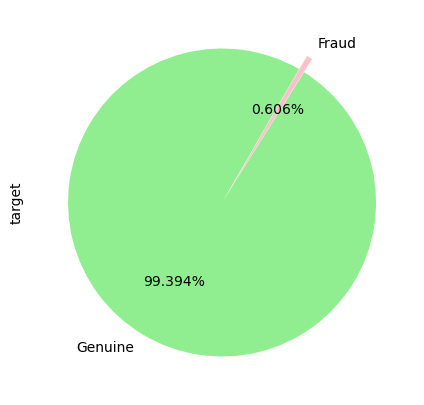

In [11]:
target_values.plot.pie(labels=['Genuine', 'Fraud'], colors=['lightgreen', 'pink'],
                       autopct='%1.3f%%', startangle=60, figsize=(5, 5), explode=[0, 0.1])

plt.show()

<font size=3>
  
- The dataset is highly unbalanced.
- We can use undersampling and oversampling techniques to reduce the bias of our predictive model.

In [12]:
"""
Group by a categorical feature and calculate fraud rates for all classes.

Parameters:
    - df (DataFrame): DataFrame containing transaction data.
    - feature (str): Feature column to calculate fraud rates for.

Returns:
    DataFrame with number of transactions and fraud rates for each class of the feature.
"""

def calculate_fraud_rates(df, feature):
    
    rates = df.groupby(feature)['target'].value_counts(dropna=False).unstack().fillna(0).astype(int)
    rates.columns = ['test', 'genuine', 'fraud']
    rates['fraud_rate'] = rates['fraud'] / (rates['genuine'] + rates['fraud'])

    return rates

In [13]:
"""
Display number of transactions and fraud rates in a styled bar chart.

Parameters:
    - df (DataFrame): DataFrame containing fraud rates.
    - sort_by (str): Column to sort the DataFrame by. (default: 'fraud')
    - n (int): Number of rows to display. (default: 10)

Returns:
    Styled DataFrame with a bar chart representation of fraud rates and number of transactions.
"""

def display_fraud_rates(df, sort_by='fraud', n=10):
    
    return df.sort_values(sort_by, ascending=False).head(n).style\
                                                   .bar(color='lightblue', subset='test')\
                                                   .bar(color='lightgreen', subset='genuine')\
                                                   .bar(color='pink', subset='fraud')\
                                                   .bar(color='khaki', subset='fraud_rate')\
                                                   .format({'fraud_rate': '{:.2%}'})

In [14]:
# Compare the number of transactions for each credit card, sorted by fraud transactions

credit_cards = calculate_fraud_rates(df, 'cc_nr')
display_fraud_rates(credit_cards, 'fraud', 10)

,test,genuine,fraud,fraud_rate
cc_nr,,,,
64e28b38341615d68a80078fb862eaad1ee414f0c3a682364122,65,154,119,43.59%
1d4d89f98110d0721da6b9b7051a9648a73dec2be66c8e0a79ef,46,149,94,38.68%
e5e04f4ecbdf28c9655427860d9c8ce28cd6b9b77dcfa9f9dd53,0,0,89,100.00%
8fe251b3388e2fbc5a2d40587a4a5fdb20e490ab88852bceaa6e,42,0,86,100.00%
e2df3eef834761da86fbfd65b8dbb7c17261b7c03ce5da601e3d,4,28,69,71.13%
d561b8090618b3e8c2069a158fbd6c279e6d03e16617b5d1c665,20,0,40,100.00%
01504f1a156defed68ac3e2023517582592bbe4ba30af9e0c386,37,0,39,100.00%
f63737a2460c310aed7c0b589133f011b80ae6f8b83e4206ee2e,0,41,34,45.33%
cd757ff8e3db78943b75d8f7fa5789bb0ff53bceebe7b9be16fe,0,1,33,97.06%


<font size=3>

- Some credit cards have been used only in fraud transactions!
- We can flag these as high-risk credit cards.

In [15]:
# Compare the number of transactions for each merchant, sorted by genuine transactions

merchants = calculate_fraud_rates(df, 'mc_id')
display_fraud_rates(merchants, 'genuine')

,test,genuine,fraud,fraud_rate
mc_id,,,,
8f18d68c2b2300ba1c6b560eedbb3e7feb4a97ca2249efd0031e,70073,106916,192,0.18%
d4c426cef1de3e40719a4da5a72effa9e6fccd3732587d57b612,26802,52332,16,0.03%
e70ff83862a39c3d9f7c891c14d9ee0f2841bdbd7670ea29e285,30135,52210,15,0.03%
e60354c25c84c774233d2c5290eb669b3f60604d71ac3eea52d2,10965,23117,156,0.67%
d4c005905687a9f310d07c7b30ed61dda58fe83eba8972c93237,11786,22414,98,0.44%
e0d92b0729b1406983f91eaf8600b24236a53d88e32efa8a7c1b,7157,17967,45,0.25%
e97913d7ddc798a130203f4f21c43d9181354ca26bceb0059f33,6872,11026,38,0.34%
108f667a534086c78dc773b61bc4cc279c2c84dc0c46af97bc62,5985,10605,32,0.30%
bedff7d1dae20eadfac484fe0a43f7c7aaccaf4e4f6c5fb332ca,5201,10334,65,0.63%


<font size=3>

- Both the test and train sets are dominated by one particular merchant.
- The fraud rate varies a lot across merchants.
- Fraud rates can be used as a feature.

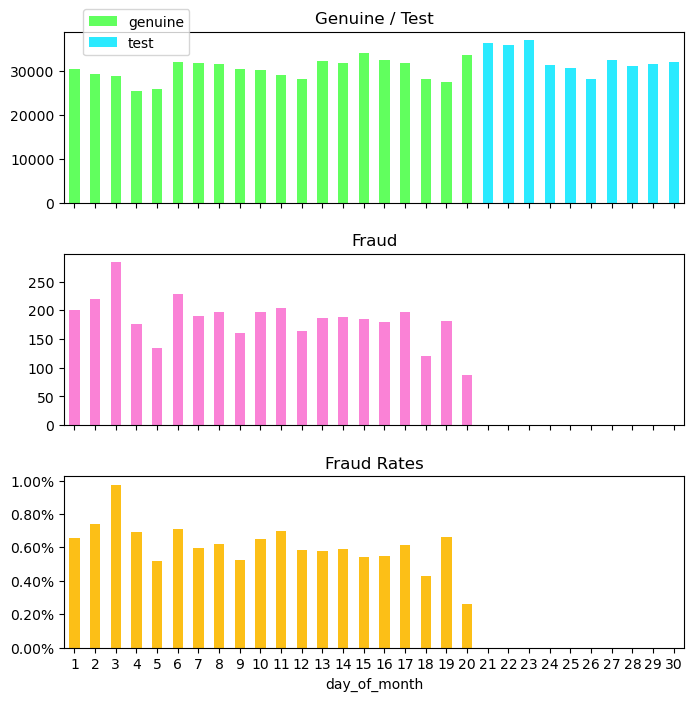

In [16]:
# Compare daily number of transactions

daily_transactions = calculate_fraud_rates(df, 'day_of_month')

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8, 8))

# Define color palette
green, pink, blue, orange = '#61ff5e', '#fa82d6', '#2beaff', '#fcbf17'

daily_transactions[['genuine', 'test']].plot.bar(ax=ax1, title='Genuine / Test', color=[green, blue], stacked=True).legend(bbox_to_anchor=(0.02, 0.82))
daily_transactions['fraud'].plot.bar(ax=ax2, title='Fraud', color=pink)
daily_transactions['fraud_rate'].plot.bar(ax=ax3 , title='Fraud Rates', color=orange).yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.subplots_adjust(hspace=0.3)
plt.xticks(rotation=0)
plt.show()

<font size=3>
    
- Train set consists of the first 20 days of the month, the rest is Test.
- Number of fraud transactions fluctuate more than the genuine transactions, as it can be seen in fraud rates.

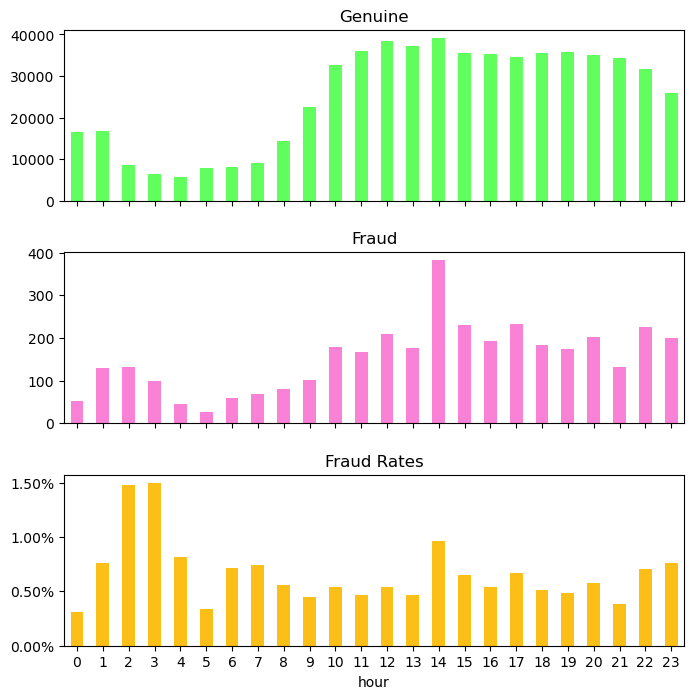

In [17]:
# Compare hourly number of transactions

hourly_transactions = calculate_fraud_rates(df, df['datetime'].dt.hour)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8, 8))

hourly_transactions['genuine'].plot.bar(ax=ax1, title='Genuine', color=green)
hourly_transactions['fraud'].plot.bar(ax=ax2, title='Fraud', color=pink)
hourly_transactions['fraud_rate'].plot.bar(ax=ax3 , title='Fraud Rates', color=orange, xlabel='hour').yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.subplots_adjust(hspace=0.3)
plt.xticks(rotation=0)
plt.show()

<font size=3>
    
- Number of transactions are significantly lower between midnight and 9 am.
- Number of fraud transactions peaked at 14 pm, this does not seem natural.
- Fraud rates peak between 2 and 3 am.
- Further testing is required to assess the potential risk of overfitting when utilizing this time-based feature.

In [18]:
# Explore transaction source

sources = df['txn_source'].value_counts()
sources

O    748416
B     96825
V     61087
M     27410
R         1
Name: txn_source, dtype: int64

<Axes: ylabel='txn_source'>

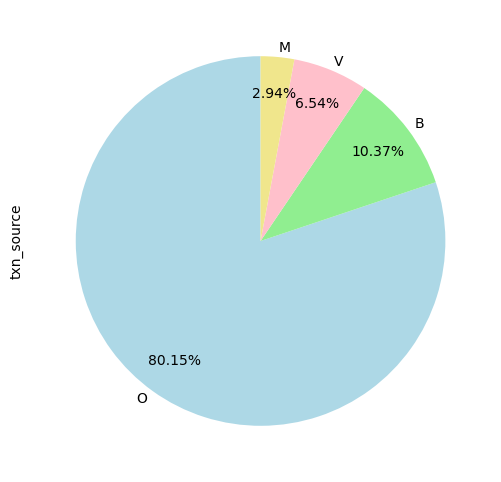

In [19]:
# Drop 'R' before plotting the pie chart
sources.drop('R').plot.pie(colors=['lightblue', 'lightgreen', 'pink', 'khaki'],
                           autopct='%1.2f%%', startangle=90, figsize=(6, 6), 
                           labeldistance=1.05, pctdistance=0.8)

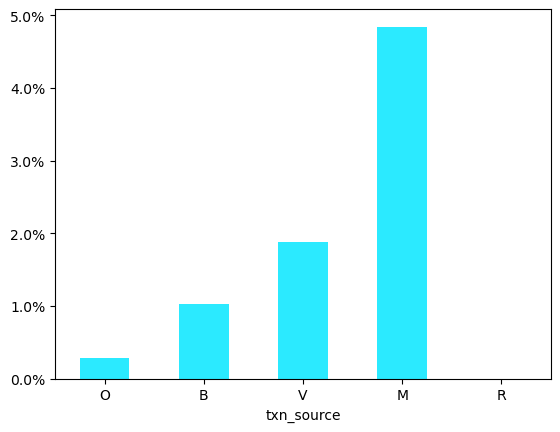

In [20]:
# Calculate fraud rates of each transaction source

source_rates = calculate_fraud_rates(df, 'txn_source')
source_rates = source_rates.sort_values('genuine', ascending=False)

source_rates['fraud_rate'].plot.bar(color=blue).yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.xticks(rotation=0)
plt.show()

<font size=3>
    
- Fraud rates are inversely proportional to the number of transactions.
- Source 'O' has the most transactions but the lowest fraud rate.
- Source 'M' has the least transactions but the highest fraud rate.
- Transaction sources can be one-hot encoded and used as a feature.

In [21]:
# Explore password verification method

verification_methods = df['txn_entry'].value_counts()
verification_methods

12d7720f7273e2a1cfb2adf5daba868b767db6281b34b312c4a4    715572
12b4164904d6ecac8163670f59dc63330075d27d1d191a4219b2    217516
34d600ed59b9dee0ed2ebefcfc24d306be443c0d04b9ae276364       650
27f9157f828401e4cecd7046da52d6ecf6c6623fc677c1d803ec         1
Name: txn_entry, dtype: int64

<Axes: ylabel='txn_entry'>

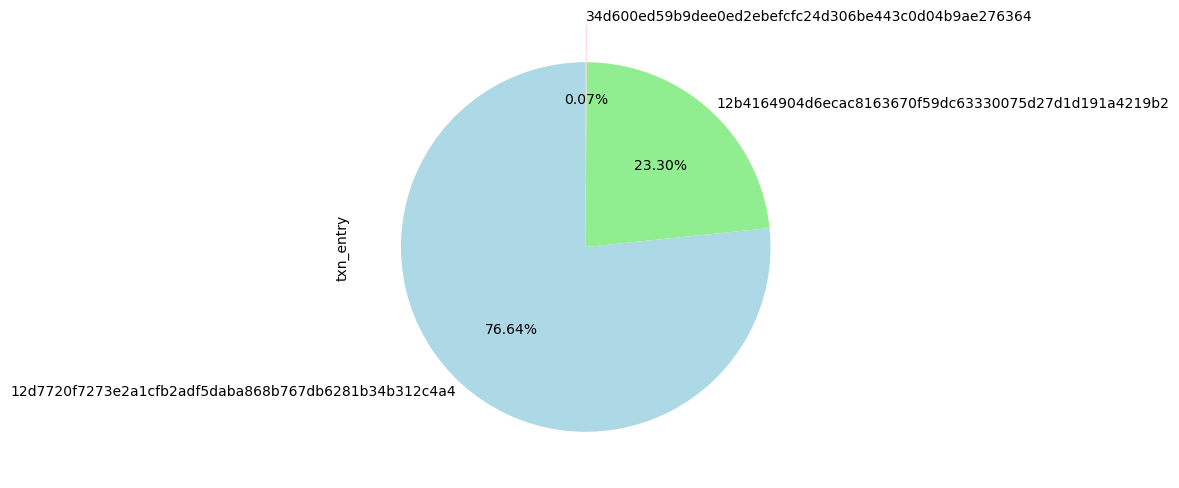

In [22]:
# Drop '27f9157f828401e4cecd7046da52d6ecf6c6623fc677c1d803ec' before plotting the pie chart
verification_methods.drop('27f9157f828401e4cecd7046da52d6ecf6c6623fc677c1d803ec').plot.pie(
                          colors=['lightblue', 'lightgreen', 'pink'],
                          autopct='%1.2f%%', startangle=90, figsize=(6, 6), 
                          labeldistance=1.05, pctdistance=0.6, explode=[0, 0, 0.2])

<font size=3>
    
- The dataset is dominated by one particular password verification method.

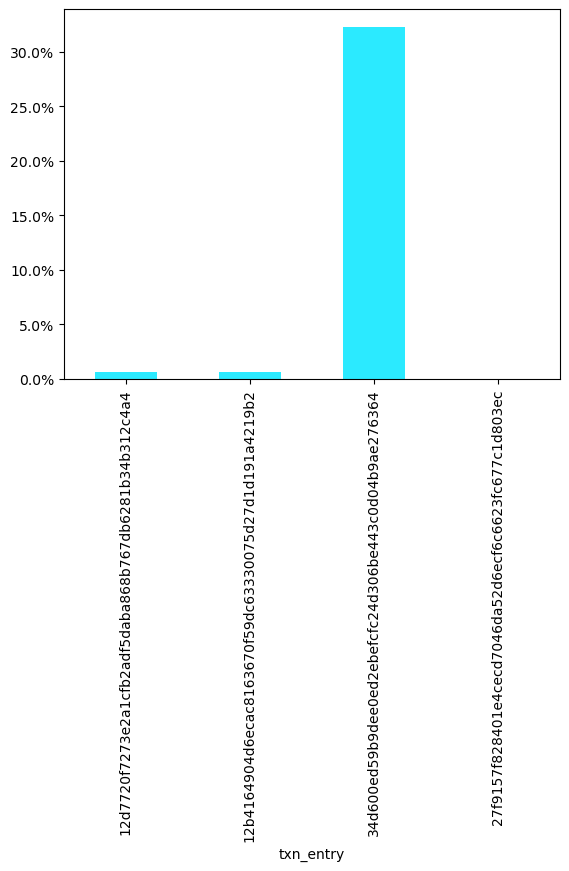

In [23]:
# Calculate fraud rates of each password verification method

method_rates = calculate_fraud_rates(df, 'txn_entry')
method_rates = method_rates.sort_values('genuine', ascending=False)

method_rates['fraud_rate'].plot.bar(color=blue).yaxis.set_major_formatter(mtick.PercentFormatter(1))

<font size=3>
    
- The two common verification methods have a similar fraud rate.
- The other method has a very high fraud rate.
- Verification sources can be one-hot encoded and used as a feature.
- We can also combine verification methods with transaction sources.

In [24]:
# Analyze transaction amounts

pd.set_option('display.float_format', '{:,.2f}'.format)

# Genuine transactions
df[df['target'] == 0]['txn_amnt'].describe()

count     603,823.00
mean          469.84
std        10,487.75
min             0.00
25%            40.00
50%            90.00
75%           240.00
max     4,792,970.00
Name: txn_amnt, dtype: float64

In [25]:
# Fraud transactions
df[df['target'] == 1]['txn_amnt'].describe()

count     3,684.00
mean      2,035.81
std       6,953.30
min           0.00
25%          20.00
50%         190.00
75%       1,020.00
max     200,000.00
Name: txn_amnt, dtype: float64

<font size=3>

- Fraud transactions has a much higher median and average than genuine transactions.
- The large difference between median and average values are caused by extreme transaction amounts.

<Axes: ylabel='Frequency'>

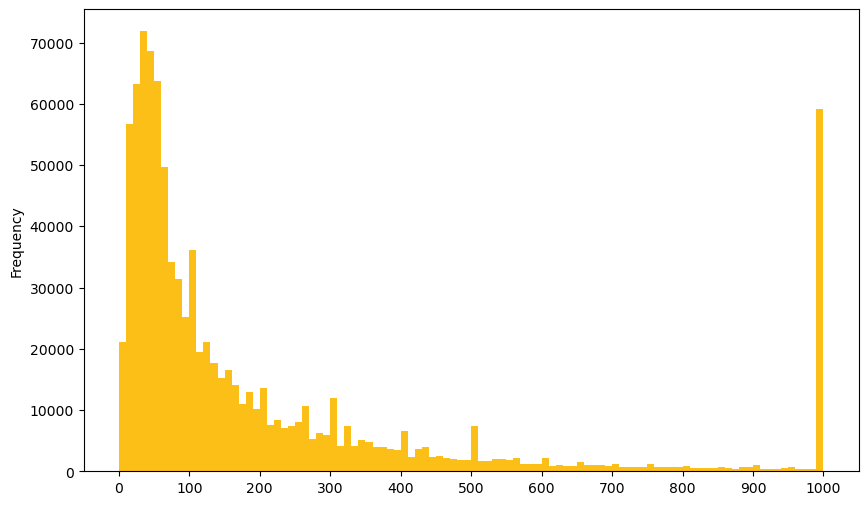

In [26]:
# Distribution of transaction amounts with bins of 10₺ and a maximum amount clipped at 1000₺

df['txn_amnt'].clip(upper=1000).plot.hist(bins=100, figsize=(10, 6), color=orange, xticks=range(0, 1001, 100))

<font size=3>

- Most transactions are between 10-100₺.
- Slight increase at round numbers like 100₺, 300₺ and 500₺.
- Does this bias affect fraud rates?

In [27]:
# Calculate mod 100 of transaction amounts 

df['price_mod_100'] = (df['txn_amnt'] % 100).astype(int)

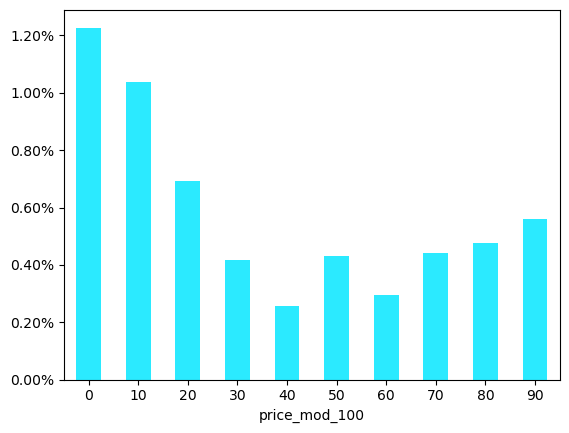

In [28]:
# Plot fraud rates of each price group

price_groups = calculate_fraud_rates(df, 'price_mod_100')

price_groups['fraud_rate'].plot.bar(color=blue).yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.xticks(rotation=0)
plt.show()

<font size=3>

- Round numbers (mod100 = 0) have a fraud rate of 1.2%, which is twice the general average 0.6%
- This is even more significant since the count of round transactions are higher than others.

In [29]:
# Compare merchant locations (cities), sorted by fraud transactions

cities = calculate_fraud_rates(df, 'city')

display_fraud_rates(cities)

,test,genuine,fraud,fraud_rate
city,,,,
8c1e38274fba4c2119fd88120b70c29cd468c6444058da8225c9,270413,495413,1697,0.34%
946e5ac3612d59a0794b381cc7e8a78877b201fb3e68775ece75,1351,2722,289,9.60%
7e943c4295cfab64ebe6d2cbe98bc5514e17d6e2dee0386ed230,2057,4058,201,4.72%
582c7d25f982181f9aae5abf839031a880ac4343d446fb0a35f0,306,642,199,23.66%
7134d02f0eaad804d8ce3f8b84d4c25d4bf0fc8162b76c3bdfee,2066,3994,139,3.36%
5bc8fd36879e2deef83e97cdb620ab598f85e7bbbd9108ab4801,7422,14576,93,0.63%
53ff9fb8ed99ce5359377e514520a6203d58957fef507a6332c7,1495,2689,76,2.75%
375ca7f7dfc434e30aed6146ab35dbac3e49bdd228087fc8cfe8,380,587,74,11.20%
943821e3b99262fcca6087c80a6230287f6aa5479e78d896d413,9408,17274,71,0.41%


In [30]:
# Compare merchant locations (countries), sorted by fraud transactions

countries = calculate_fraud_rates(df, 'country')

display_fraud_rates(countries)

,test,genuine,fraud,fraud_rate
country,,,,
368a2b6e4893c8ab01c18959a187dcde2ab916161f72e19e71dd,297505,545603,2010,0.37%
18ea71c60d9b0fa64274e50b983f7b8515f7a0971395f44f9179,9407,18058,896,4.73%
ab47b41e2b6e1a0c1bfa4a63399a0de258e91f0531656a9d116c,5955,12053,329,2.66%
cd6e90b3b66b483f466444bcc2e56fadb9b5bfdfca8ee71ec593,1502,2650,148,5.29%
d2e685c2ad187427e826956fc5be5b0f36eb758fb4a354ef26f8,7108,14647,61,0.41%
c84c2b556e9d52b18f41901b5ee3f39e826c18be78de0f17a560,530,970,52,5.09%
edc835921a97d2d5d1b786732d546217cafcdc903867c705cb11,2303,4503,31,0.68%
f5849d2db2f823e68cdd7f7724894b56c73572526de2c70aab74,268,619,23,3.58%
7ba48efcbdb081364204d11737a055c1c52fa10c6f08e7dfbb6c,143,254,21,7.64%


<font size=3>
    
- The dataset is dominated by merchants in a particular country and city.
- We can observe that some cities and countries have a significantly higher fraud rate.

In [31]:
countries[countries['fraud'] > 10].sort_values('fraud_rate', ascending=False)

,test,genuine,fraud,fraud_rate
country,,,,
71d6f62c60921cc71ba66c35c5d06c87aa967390787e670cff94,29,54,14,0.21
3dced5489973b89c031266e697846c5b66bfd20864ecfa6694fe,71,74,15,0.17
b840db58eacaee9e6555402e5c04fe74dc625630471993e64bd6,164,161,15,0.09
7ba48efcbdb081364204d11737a055c1c52fa10c6f08e7dfbb6c,143,254,21,0.08
cd6e90b3b66b483f466444bcc2e56fadb9b5bfdfca8ee71ec593,1502,2650,148,0.05
c84c2b556e9d52b18f41901b5ee3f39e826c18be78de0f17a560,530,970,52,0.05
18ea71c60d9b0fa64274e50b983f7b8515f7a0971395f44f9179,9407,18058,896,0.05
f5849d2db2f823e68cdd7f7724894b56c73572526de2c70aab74,268,619,23,0.04
ab47b41e2b6e1a0c1bfa4a63399a0de258e91f0531656a9d116c,5955,12053,329,0.03


In [32]:
# Compare merchant industries, sorted by fraud transactions

industries = calculate_fraud_rates(df, 'mcc_code')

display_fraud_rates(industries)

,test,genuine,fraud,fraud_rate
mcc_code,,,,
03a768696503f2039b82f8ab09c7c2c1d7c59fd5357dddafe50b,33637,67580,432,0.64%
81b9492bb27d86184e76f55fce0168f5f296cc14bf8cb641949c,2155,4378,383,8.04%
3837c6e5afa90b4966e82a240ea40daa40852d1925b5a737984c,3179,5203,357,6.42%
9c5ab283ab8a30e71a94b80bbf81c6459b998d9233c8454991e0,76582,119419,256,0.21%
9bcde6cbc9021358668bc16cd3fbf6715669db89fd4570e2682c,18244,38657,245,0.63%
04636ab3b4bf60eab961ab97ac01f0016b6a3b6b4f42d39fd4ae,1487,2828,146,4.91%
bad448aed74dea28746fcf57847f0cdd92f6baee733892ca25fb,229,397,136,25.52%
16c35b34cb557dc5f437c4c779312afe78f1d26392b6b5aca352,2362,5042,136,2.63%
c843fd5bc0681e086736951677427c4c6bcdb2bdc96aaaccdc35,1503,3069,104,3.28%


<font size=3>
    
- The dataset is dominated by two industries with relatively low fraud rates.
- Some industries have significantly high fraud rates.

# Feature Engineering <a id='features'></a>

In [33]:
"""
    Generate customer clusters based on fraud rates and number of transactions.
    Plot clusters and display cluster centers.
    This function should be run separately for customers with low and high amounts of fraud transactions.

    Parameters:
        original_df (DataFrame): DataFrame containing transaction data.
        determine_for (str): Column name to determine clusters for. (default: 'cc_nr')
        min_fraud_count (int): Minimum number of fraud transactions for inclusion in clusters. (default: 0)
        max_fraud_count (int): Maximum number of fraud transactions for inclusion in clusters. (default: 1000)
        k (int): Number of clusters to create. (default: 10)
        cmap (str): Colormap to use for plotting clusters. (default: 'hsv')

    Returns:
        DataFrame with customer id's and cluster labels
"""

def generate_customer_clusters(original_df, determine_for='cc_nr', min_fraud_count=0, max_fraud_count=1000, k=10, cmap='hsv'):
    
    # Calculate fraud rates and number of transactions
    df = calculate_fraud_rates(original_df, determine_for)
    df['number_of_transactions'] = df['genuine'] + df['fraud']

    # Filter customers based on the number of fraud transactions
    df = df[df['number_of_transactions'] > 0]
    df = df[(df['fraud'] >= min_fraud_count) & (df['fraud'] < max_fraud_count)]
    
    # Normalize the number of transactions by dividing each value by the 99th percentile
    quantile_99 = df['number_of_transactions'].quantile(0.99)
    df['number_of_transactions'] = df['number_of_transactions'] / quantile_99
    
    # Cluster customers based on fraud rate and number of transactions
    df = df[['fraud_rate', 'number_of_transactions']]
    
    # Run KMeans algorithm, number of clusters determined by trial and error
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(df)
    
    # Rescale number of transactions
    df['number_of_transactions'] = df['number_of_transactions'] * quantile_99 
    kmeans.cluster_centers_[:, 1] = kmeans.cluster_centers_[:, 1] * quantile_99
    
    # Plot clusters
    plt.scatter(x=df['fraud_rate'], y=df['number_of_transactions'], c=kmeans.labels_, cmap=cmap, alpha=0.5, edgecolor="white")
    plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker="P", c="black", edgecolor="white")
    plt.xlabel('Fraud Rate')
    plt.ylabel('Number of Transactions')
    plt.title('Customer Clusters')
    plt.show()
    
    # Add cluster labels to customers
    df['cluster_label'] = kmeans.labels_

    # Display cluster centers and labels
    cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['center_fr', 'center_nt'])
    cluster_centers.reset_index(inplace=True, names='cluster_label')
    print(cluster_centers)
    
    return df

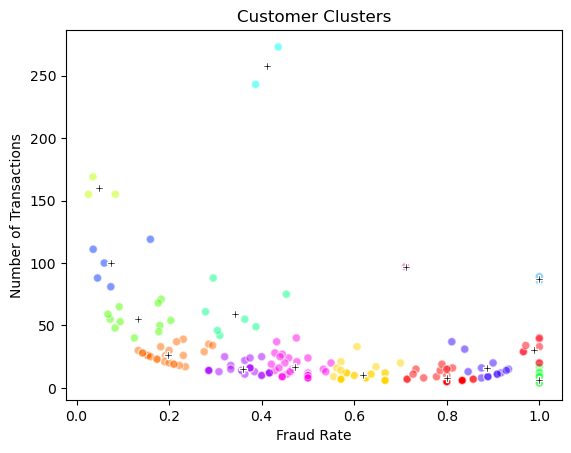

    cluster_label  center_fr  center_nt
0               0       0.80       8.00
1               1       0.20      26.58
2               2       0.62      10.74
3               3       0.05     159.67
4               4       0.13      55.27
5               5       1.00       6.44
6               6       0.34      59.43
7               7       0.41     258.00
8               8       1.00      87.50
9               9       0.08      99.80
10             10       0.89      15.85
11             11       0.36      15.45
12             12       0.47      16.96
13             13       0.71      97.00
14             14       0.99      30.50


In [34]:
# Generate clusters for customers that have at least 4 fraud transactions

clusters_high_fraud = generate_customer_clusters(df, determine_for='cc_nr', min_fraud_count=4, max_fraud_count=1000, k=15, cmap='hsv')

<font size=3>
    
KMeans algorithm successfully identified clusters based on fraud rates and number of transactions:

- Cluster #8 represents 2 customers with a 100% fraud rate and very high confidence.
- Cluster #14 represents customers with a 98% fraud rate and high confidence.
- Cluster #5 represents customers with a 100% fraud rate but with lower confidence.
- Cluster #13 represents a single customer. This customer can be merged into Cluster #0, which has a slightly higher fraud rate.

In [35]:
# Manually merge cluster #13 into cluster #0

clusters_high_fraud.loc[clusters_high_fraud['cluster_label'] == 13, 'cluster_label'] = 0

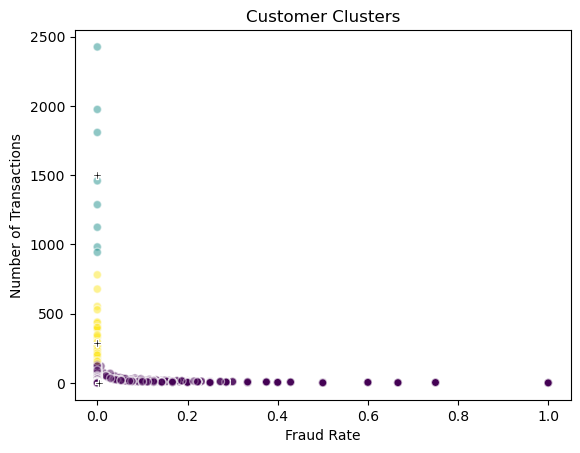

   cluster_label  center_fr  center_nt
0              0       0.00       3.70
1              1       0.00   1,500.25
2              2       0.00     292.57


In [36]:
# Generate clusters for customers that have less than 4 fraud transactions

clusters_low_fraud = generate_customer_clusters(df, determine_for='cc_nr', min_fraud_count=0, max_fraud_count=4, k=3, cmap='viridis')

<font size=3>
    
KMeans algorithm successfully identified clusters based on fraud rates and number of transactions:

- Cluster #0 represents customers with a very low number of transactions, indicating a lower confidence level in identifying potential fraud.
- Cluster #1 represents customers with 0% fraud rate and very high confidence.
- Cluster #2 represents customers with a very low fraud rate and high confidence.
- To prevent overlap with previous clusters, cluster labels should be offset by 15.
- Customers present only in the test set will be assigned to Cluster #0

In [37]:
# Offset cluster labels to avoid overlapping with high fraud clusters

clusters_low_fraud['cluster_label'] = clusters_low_fraud['cluster_label'] + 15

In [38]:
# Concat all clusters
all_clusters = pd.concat([clusters_high_fraud, clusters_low_fraud], axis=0)

# Join cluster labels to original df
df = df.join(all_clusters['cluster_label'], on='cc_nr', how='left')

# Assign customers only present in the test set to cluster #15 (cluster with very low amount of transactions)
df['cluster_label'] = df['cluster_label'].fillna(15)
df['cluster_label'] = df['cluster_label'].astype(int)

<font size=3>
    
After conducting several tests, we observed that including these cluster labels as a feature in the model resulted in overfitting. To address this issue, we propose an alternative approach by flagging clusters #5, #8, and #14 as risky clusters. 
    
We have determined that customers belonging to these clusters consistently engage in fraudulent transactions, providing us with a higher level of confidence. By identifying these specific clusters as risky, we can effectively capture the fraudulent patterns exhibited by these customers without relying solely on the cluster labels as model features.

In [39]:
# Flag clusters #5, #8 and #14 as risky clusters

df['risky_cluster'] = 0
df.loc[df['cluster_label'].isin([5, 8, 14]), 'risky_cluster'] = 1

In [41]:
"""
    Calculate the Mean Absolute Deviation (MAD) ratio of transaction amounts for each transaction based on a given feature.
    
    Parameters:
        - original_df (DataFrame): DataFrame containing transaction data.
        - determine_for (str): Feature column to calculate MAD ratio for.
        - rolling_window (int): The size of the rolling window for calculating the median and MAD. (default: 10)
        
    Returns:
        DataFrame with the MAD ratio column added.
"""

def calculate_mad_ratio(original_df, determine_for, rolling_window=10):
    
    # Determine the prefix based on the feature to use in column names
    if determine_for == 'cst_nr':
        prefix = 'customer'    
    elif determine_for == 'cc_nr':
        prefix = 'card'    
    elif determine_for == 'mc_id':
        prefix = 'merchant'  
    else:
        raise ValueError("Invalid feature: '{}'".format(determine_for))

    # Find median of last 10 transactions per customer/merchant
    df = original_df.sort_values([determine_for, 'datetime'], ascending=[True, True], inplace=False)
    df['median'] = df.groupby(determine_for)['txn_amnt'].rolling(window=rolling_window, min_periods=1).median().reset_index(0, drop=True)
    
    # Calculate absolute deviation for each transaction
    df['absolute_deviation'] = abs(df['txn_amnt'] - df['median'])
    
    # Calculate MAD of last 10 transactions
    df['mad'] = df.groupby(determine_for)['absolute_deviation'].rolling(window=rolling_window, min_periods=1).median().reset_index(0, drop=True)
    df.loc[df['mad'] < 1, 'mad'] = 1
    
    # Calculate the MAD ratio for each transaction (negative for smaller transactions)
    df['mad_ratio_' + prefix] = (df['txn_amnt'] - df['median']) / df['mad']
    #df['mad_ratio_' + prefix] = df['absolute_deviation'] / df['mad']
    
    df['mad_ratio_' + prefix] = df['mad_ratio_' + prefix].fillna(0)

    df = df.drop(['median', 'absolute_deviation', 'mad'], axis=1)

    return df

In [42]:
df = calculate_mad_ratio(df, 'cst_nr', 10)
df = calculate_mad_ratio(df, 'cc_nr', 10)
df = calculate_mad_ratio(df, 'mc_id', 100)

In [43]:
# Grouped transaction amounts as in the EDA section

df['price_mod_100'] = (df['txn_amnt'] % 100).astype(int)
df['price_mod_200'] = (df['txn_amnt'] % 200).astype(int)

df['hour'] = df['datetime'].dt.hour.astype(int)

In [44]:
"""
    Calculate and normalize the time differences between consecutive transactions for each customer or credit card.

    Parameters:
        - original_df (DataFrame): DataFrame containing transaction data.
        - determine_for (str): Column name to determine time differences for. (default: 'cst_nr')

    Returns:
        DataFrame with time difference features.
"""

def calculate_time_diff(original_df, determine_for='cst_nr'):

    # Calculate the time difference in minutes between consecutive transactions for each customer
    df = original_df.sort_values([determine_for, 'datetime'], ascending=[True, True], inplace=False)
    df['minute_diff_last_txn'] = df.groupby(determine_for)['datetime'].diff().dt.total_seconds() / 60

    # Calculate the median time difference between consecutive transactions for each customer
    df['minute_diff_median'] = df.groupby(determine_for)['minute_diff_last_txn'].transform('median')

    # Fill median time difference for customers with a single transaction using the general median
    df['minute_diff_median'] = df['minute_diff_median'].fillna(df['minute_diff_median'].median())

    # Fill the time difference of first transactions for each customer with their median time difference
    df['minute_diff_last_txn'] = df['minute_diff_last_txn'].fillna(df['minute_diff_median'])

    # Calculate the normalized time difference between consecutive transactions for each customer
    df['minute_diff_normalized'] = (df['minute_diff_last_txn'] - df['minute_diff_median']) / df['minute_diff_median']
    df['minute_diff_normalized'] = df['minute_diff_normalized'].fillna(0)
    df.loc[(df['minute_diff_last_txn'] > 0) & (df['minute_diff_median'] == 0), 'minute_diff_normalized'] = 1

    df = df.drop('minute_diff_median', axis=1)
    
    return df

In [45]:
df = calculate_time_diff(df, 'cst_nr')

In [46]:
df['minute_diff_normalized'].describe()

count   933,739.00
mean         35.90
std         647.22
min          -1.00
25%          -0.38
50%           0.00
75%           0.50
max      72,609.00
Name: minute_diff_normalized, dtype: float64

In [47]:
df[df['target'] == 0]['minute_diff_normalized'].describe()

count   603,823.00
mean         23.13
std         429.32
min          -1.00
25%          -0.36
50%           0.00
75%           0.30
max      51,889.00
Name: minute_diff_normalized, dtype: float64

In [48]:
df[df['target'] == 1]['minute_diff_normalized'].describe()

count    3,684.00
mean        46.43
std        459.44
min         -1.00
25%         -0.98
50%          0.00
75%          0.38
max     16,982.00
Name: minute_diff_normalized, dtype: float64

In [49]:
"""
    Determine changed features based on the most common class within a rolling window.

    Parameters:
        - original_df (DataFrame): DataFrame containing transaction data.
        - feature (str): The name of the feature column to analyze.
        - determine_for (str): The column to determine changes for. (default: 'cc_nr')
        - rolling_window (int): The size of the rolling window. (default: 5)

    Returns:
        DataFrame with added feature change column.
"""

def determine_feature_change(original_df, feature, determine_for='cc_nr', rolling_window=5):
    
    # Sort the DataFrame based on the determine_for column and datetime in ascending order
    df = original_df.sort_values([determine_for, 'datetime'], ascending=[True, True], inplace=False)
    
    # Label encode the feature column
    label_encoder = LabelEncoder()
    df['feature_encoded'] = label_encoder.fit_transform(df[feature])
    
    # Calculate the most common class within the rolling window for each customer or credit card group
    df['most_common_class'] = df.groupby(determine_for)['feature_encoded'].rolling(window=rolling_window, min_periods=1).apply(lambda x: x.mode()[0]).reset_index(0, drop=True)
    
    # Set feature change to 0 for rows where feature_encoded matches the most_common_class
    df[feature + '_change'] = 1
    df.loc[df['feature_encoded'] == df['most_common_class'], feature + '_change'] = 0
    
    # Drop the temporary feature_encoded and most_common_class columns
    df = df.drop(['feature_encoded', 'most_common_class'], axis=1)
    
    return df

In [50]:
df = determine_feature_change(df, 'txn_source')
df = determine_feature_change(df, 'txn_entry')
df = determine_feature_change(df, 'city')

# Number of changed features
df['change_count'] = df['txn_source_change'] + df['txn_entry_change'] + df['city_change']

In [51]:
"""
    Determine exact duplicates in consecutive transactions for each credit card.
    Check columns merchant id, transaction amount, transaction source and password verification method.

    Parameters:
        - original_df (DataFrame): Dataframe containing transaction data.
        - determine_for (str): Column name to determine duplicates for. (default: 'cc_nr')

    Returns:
        DataFrame with an additional column 'exact_duplicate' indicating exact duplicates.
"""

def determine_exact_duplicates(original_df, determine_for='cc_nr'):
    
    # Sort the DataFrame based on the determine_for column and datetime
    df = original_df.sort_values([determine_for, 'datetime'], inplace=False)
    df['exact_duplicate'] = 0
    
    # Check if consecutive transactions have the same values for specified columns
    duplicate_indices = (df['mc_id'] == df['mc_id'].shift()) & \
                        (df['txn_amnt'] == df['txn_amnt'].shift()) & \
                        (df['txn_source'] == df['txn_source'].shift()) & \
                        (df['txn_entry'] == df['txn_entry'].shift())
    
    # Set 'exact_duplicate' column to 1 for exact duplicates
    df.loc[duplicate_indices, 'exact_duplicate'] = 1
    
    return df

In [52]:
df = determine_exact_duplicates(df)

In [55]:
df

,target,cst_nr,cc_nr,day_of_month,day_of_week,txn_time,txn_source,txn_trm,txn_entry,txn_amnt,...,price_mod_200,hour,minute_diff_last_txn,minute_diff_normalized,txn_source_change,txn_entry_change,city_change,change_count,exact_duplicate,risk_level
77907,0.00,93e417191764e6f505c1986a5a05d89e6d95fd92b06f56...,000089285ee94f2d0403a077330f1ed8f6c480b75436ca...,12,1,542,V,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,50.00,...,50,5,"1,353.00",0.00,0,0,0,0,0,0
200175,0.00,0e1211400cc721ce0a93ad06d40fad3a7888bdf43da45e...,000099112ac7f751c1b92085da367c23d3c440b4cd2ccb...,6,2,1353,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,180.00,...,180,13,"10,257.50",0.00,0,0,0,0,0,0
200176,0.00,0e1211400cc721ce0a93ad06d40fad3a7888bdf43da45e...,000099112ac7f751c1b92085da367c23d3c440b4cd2ccb...,14,3,2222,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,30.00,...,30,22,"12,029.00",0.17,0,1,0,1,0,0
200174,0.00,0e1211400cc721ce0a93ad06d40fad3a7888bdf43da45e...,000099112ac7f751c1b92085da367c23d3c440b4cd2ccb...,20,2,1948,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,40.00,...,40,19,"8,486.00",-0.17,0,0,0,0,0,0
478812,0.00,64d435d4031363b33155d57b46b711b5cc24aac5ff3f4b...,0000cc7ced024877444e121271fde1beef11191519f821...,8,4,1748,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,40.00,...,40,17,"3,149.50",0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882280,NaN,70dfc9ba9148fabb8aec05f52e56a92c120a6889eda3e2...,fffe5006bde899a9dcf7cb0ec7e2ace616f01395e6eb0d...,30,5,2356,V,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,30.00,...,30,23,0.00,0.00,0,0,0,0,0,0
506379,0.00,670042ff33b7b138af5cd433413926e0547ea9d1aeb9a1...,fffe6d57c2a5f31a3704fed930409faf0cce1fe2ef3377...,7,3,31,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,130.00,...,130,0,"1,353.00",0.00,0,0,0,0,0,0
341763,0.00,6ec55cdc783fc084f2fec0ee3550c04aa5da1dc3409972...,fffefd161e3a94d7159a0fc9cd6a041df3356769612171...,16,5,1030,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,260.00,...,60,10,"5,193.50",0.00,0,0,0,0,0,0
794976,NaN,6ec55cdc783fc084f2fec0ee3550c04aa5da1dc3409972...,fffefd161e3a94d7159a0fc9cd6a041df3356769612171...,23,5,1531,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,"1,940.00",...,140,15,"10,381.00",1.00,0,0,1,1,0,0


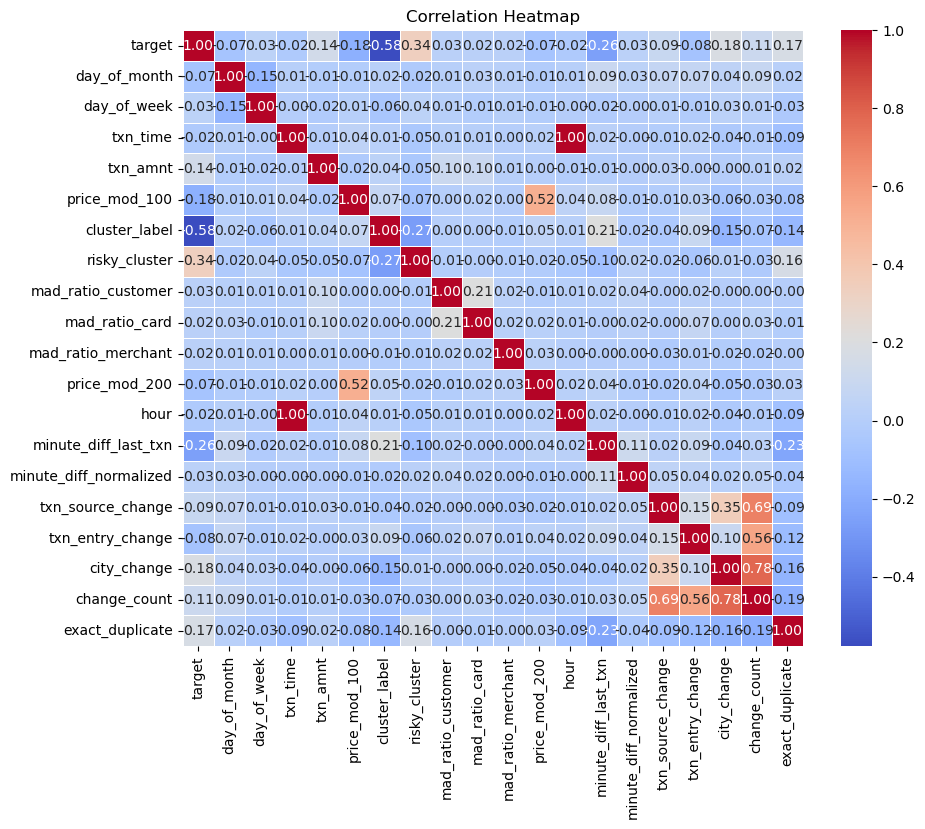

In [59]:
# Display average correlation matrix for numeric columns using random subsamples to balance target variable.

correlation_matrices = []

for i in range(100):

    random_sample = df[df['target'] == 0].sample(n=3684, random_state=i)
    sample_data = pd.concat([random_sample, df[df['target'] == 1]], axis=0)
    
    correlation_matrix = sample_data.corr(numeric_only=True)
    correlation_matrices.append(correlation_matrix)
    
average_correlation_matrix = sum(correlation_matrices) / 100

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(average_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Building the Model <a id='model'></a>

In [60]:
df = df.sort_index()
df

,target,cst_nr,cc_nr,day_of_month,day_of_week,txn_time,txn_source,txn_trm,txn_entry,txn_amnt,...,mad_ratio_merchant,price_mod_200,hour,minute_diff_last_txn,minute_diff_normalized,txn_source_change,txn_entry_change,city_change,change_count,exact_duplicate
0,0.00,c64007916f81cb9543a6aacc768a15d5eefde44318b3c0...,bf4e876751b8785159aad106b055123b6cdda8a9591d5f...,8,4,1800,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,540.00,...,2.71,140,18,"27,420.00",0.00,0,0,0,0,0
1,0.00,24882e5a50d43c050f71ffdfc0061550a8bf5e6eb0911c...,933c28d9d4c6fb6db04a2209f34def95497ea3060f581b...,11,7,1404,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,"49,490.00",...,119.36,90,14,"5,180.00",3.02,0,0,0,0,0
2,0.00,24882e5a50d43c050f71ffdfc0061550a8bf5e6eb0911c...,194024f4b029f8df4e045ad034588ef6fc1957d39ab3d5...,17,6,1750,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,"5,040.00",...,43.32,40,17,"2,539.00",0.97,0,1,0,1,0
3,0.00,24882e5a50d43c050f71ffdfc0061550a8bf5e6eb0911c...,194024f4b029f8df4e045ad034588ef6fc1957d39ab3d5...,1,4,1741,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,10.00,...,-0.94,10,17,"1,290.00",0.00,0,0,0,0,0
4,0.00,24882e5a50d43c050f71ffdfc0061550a8bf5e6eb0911c...,933c28d9d4c6fb6db04a2209f34def95497ea3060f581b...,7,3,2344,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,"47,760.00",...,136.70,160,23,"9,003.00",5.98,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933734,NaN,d044568959f4185f154cdd2162287c64f55380846ebb42...,d2c58c43f4bcc0b954cf6b247690ffafc64f5a77254760...,26,1,1731,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,130.00,...,4.25,130,17,"1,400.00",0.41,0,0,0,0,0
933735,NaN,d044568959f4185f154cdd2162287c64f55380846ebb42...,d2c58c43f4bcc0b954cf6b247690ffafc64f5a77254760...,25,7,1811,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,100.00,...,3.00,100,18,65.00,-0.93,0,0,0,0,0
933736,NaN,d044568959f4185f154cdd2162287c64f55380846ebb42...,d2c58c43f4bcc0b954cf6b247690ffafc64f5a77254760...,28,3,1522,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,60.00,...,1.00,60,15,"2,750.00",1.77,0,0,0,0,0
933737,NaN,084c9e32b0360529cbc3e7f5e7bdba45a428d05ca64b17...,4350da3e5a3b9d2db6660cd76dbaebd4cfa0d2c538255c...,28,3,1153,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,140.00,...,-0.24,140,11,"1,353.00",0.00,0,0,0,0,0


In [61]:
# Drop unnecessary columns
df = df.drop(['day_of_month', 'txn_trm', 'mc_name', 'datetime'], axis=1)

# Convert string columns to category
string_columns = df.select_dtypes(include='object').columns
df[string_columns] = df[string_columns].astype('category')

# Convert cluster labels to category
df['cluster_label'] = df['cluster_label'].astype('category')

In [62]:
df.dtypes

target                     float64
cst_nr                    category
cc_nr                     category
day_of_week                  int64
txn_time                     int64
txn_source                category
txn_entry                 category
txn_amnt                   float64
city                      category
country                   category
mc_id                     category
mcc_code                  category
price_mod_100                int64
cluster_label             category
risky_cluster                int64
mad_ratio_customer         float64
mad_ratio_card             float64
mad_ratio_merchant         float64
price_mod_200                int64
hour                         int64
minute_diff_last_txn       float64
minute_diff_normalized     float64
txn_source_change            int64
txn_entry_change             int64
city_change                  int64
change_count                 int64
exact_duplicate              int64
dtype: object

In [63]:
# Split train and test sets

train = df[df['target'].notnull()]
test = df[df['target'].isnull()]

In [64]:
# Drop other columns (experimental)

train2 = train.drop(['cst_nr', 'cc_nr', 'country', 'mc_id', 'price_mod_100', 'cluster_label'], axis=1)
test2 = test.drop(['cst_nr', 'cc_nr', 'country', 'mc_id', 'price_mod_100', 'cluster_label'], axis=1)

In [68]:
# Cross validate XGBoost model

# Separate features (X) and target variable (y)
y = train2['target']
X = train2.drop('target', axis=1)

# Define XGBoost model
model = xgb.XGBClassifier(
    tree_method='gpu_hist',
    objective='binary:logistic',
    enable_categorical=True,
    max_depth=9,
    learning_rate=0.2,
    n_estimators=300)

# Perform stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')

# Print cross-validation scores
print("CV Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

CV Scores: [0.9668947  0.9623388  0.9638614  0.9708745  0.95667543]
Mean CV Score: 0.9641289669052899


In [71]:
# Build the XGBoost model

# Separate features (X) and target variable (y)
y = train2['target']
X = train2.drop('target', axis=1)

X_test = test2.drop('target', axis=1)

# Train the final model on the entire training data
model.fit(X, y)

# Make predictions on the test set
y_pred = model.predict_proba(X_test)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

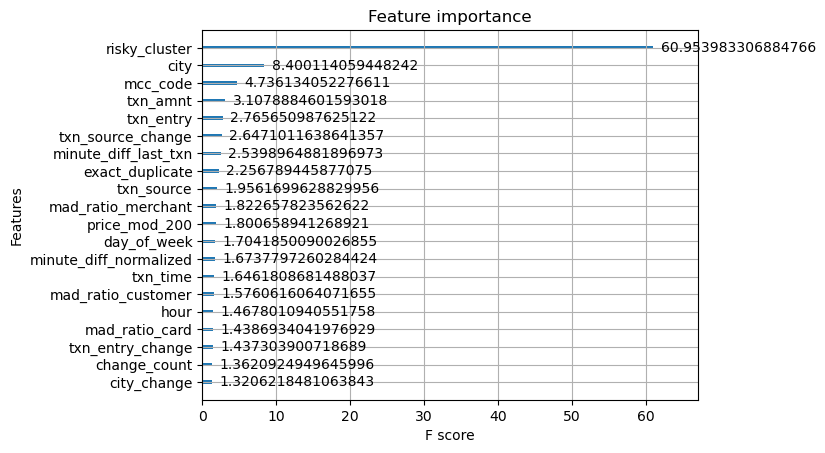

In [73]:
xgb.plot_importance(model, importance_type='gain')

In [ ]:
# Submit predictions

predictions = pd.DataFrame(y_pred[:, 1])
predictions.columns = ['Predicted']
predictions['Id'] = predictions.index
predictions.to_csv('submission.csv', index=False)